## Customer Segmentation using K-Means

## 1. Project Objective

The objective of this project is to perform customer segmentation on the **customer data** dataset.  
By using **K-Means clustering**, we aim to group customers based on their **Age**, **Annual Income**, and **Spending Score**.  
The goal is to provide actionable recommendations for **targeted marketing strategies**.


In [23]:
# --- Environment Setup and Imports ---

import os
os.environ["OMP_NUM_THREADS"] = "1"  # Prevents potential multi-threading issues on some systems
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
from sklearn.exceptions import DataConversionWarning

# This will ignore only the K-Means memory leak warning
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

In [24]:
# For reproducibility
np.random.seed(42)
data = {
    'Customer ID': range(1, 201),
    'Age': np.random.randint(18, 70, 200),
    'Annual Income': np.random.randint(15, 140, 200),  # In thousands ($)
    'Spending Score': np.random.randint(1, 100, 200) # 1-100
}
sample_df = pd.DataFrame(data)
sample_df.to_csv('customer_data.csv', index=False)
print("Sample 'customer_data.csv' created.")
# --- End of Synthetic Data Creation ---


# --- Step 1: Load and Inspect the Dataset ---

# 1. Load the Dataset
df = pd.read_csv(r"C:\Users\suraj\Downloads\archive (2)\Mall_Customers.csv")

# 2. Inspect the dataset
print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Data Types and Missing Values ---")
df.info()

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- Check for Duplicates ---")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Sample 'customer_data.csv' created.

--- First 5 Rows ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- Data Types and Missing Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: i

In [25]:
# --- Step 2: Feature Selection and Scaling ---

# Pick the features that matter for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("--- Scaled Data (First 5 Rows) ---")
print(X_scaled[:5])

--- Scaled Data (First 5 Rows) ---
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


## 2. Finding the Optimal Number of Clusters

To find the optimal number of clusters (*k*), we used the **Elbow Method**.  
We plotted the **Within-Cluster Sum of Squares (WCSS)** for *k* values from 1 to 10.


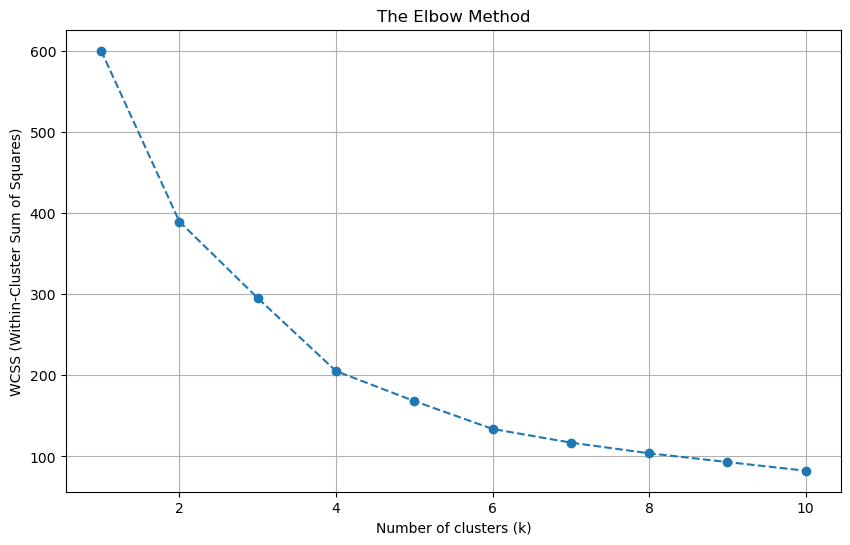

In [26]:
# ---- Determine optimal cluster count using the Elbow Method ----
wcss = []
k_range = range(1, 11)  # Test k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # Within-cluster sum of squares


# Plot WCSS to identify the elbow point
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

**Finding:**  
The plot shows a clear "elbow" at **k = 5**.  
This indicates that **5 clusters** is the optimal number for this dataset.


## 3. Visualizing the Customer Segments

We applied K-Means using the optimal number of clusters (*k = 5*).  
To visualize the data in 2D, we used **Principal Component Analysis (PCA)** to reduce the 3 features to 2 dimensions.


In [27]:
# Selected k based on elbow observation
optimal_k = 5

# ---- K-Means Clustering ----
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

# fit_predict runs the algorithm and returns the cluster label for each customer
cluster_labels = kmeans.fit_predict(X_scaled)

# --- Deliverable 1: Clustered Dataset ---
# Append cluster assignments to dataset
df['Cluster'] = cluster_labels

print("\n--- Dataset with Cluster Labels (First 5 Rows) ---")
print(df.head())


--- Dataset with Cluster Labels (First 5 Rows) ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        1  
1        1  
2        0  
3        1  
4        1  


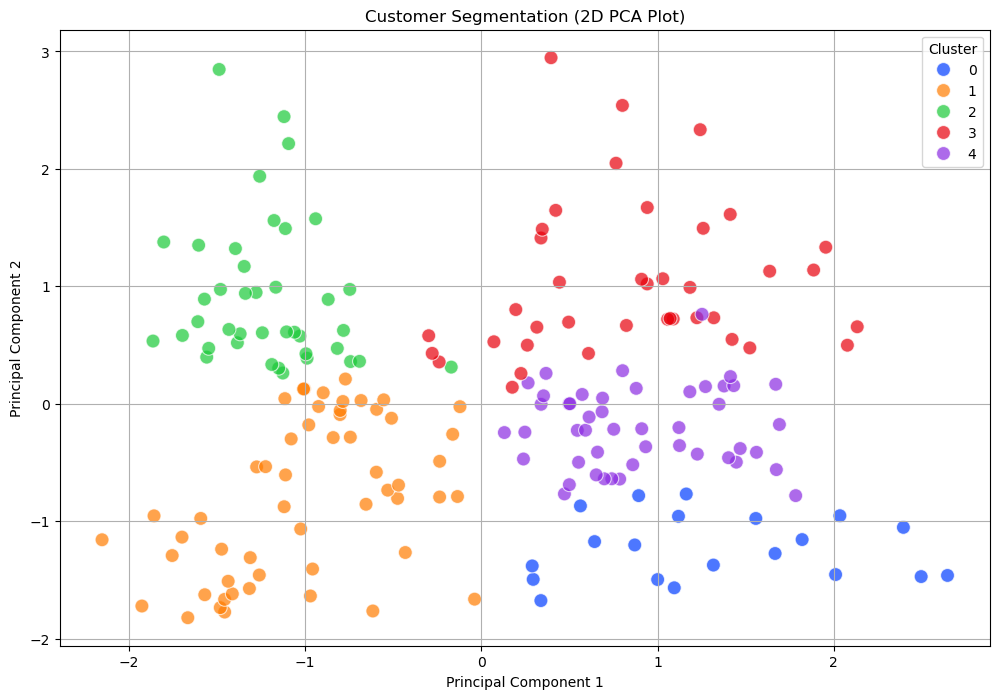

In [28]:
# ---- PCA for 2D visualization ----
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels

# Scatter plot of clusters (PCA projection)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pca_df,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='bright', # Use a distinct color palette
    s=100,          # Set marker size
    alpha=0.7       # Set marker transparency
)
plt.title('Customer Segmentation (2D PCA Plot)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


--- Generating Pair Plots (This may take a moment) ---


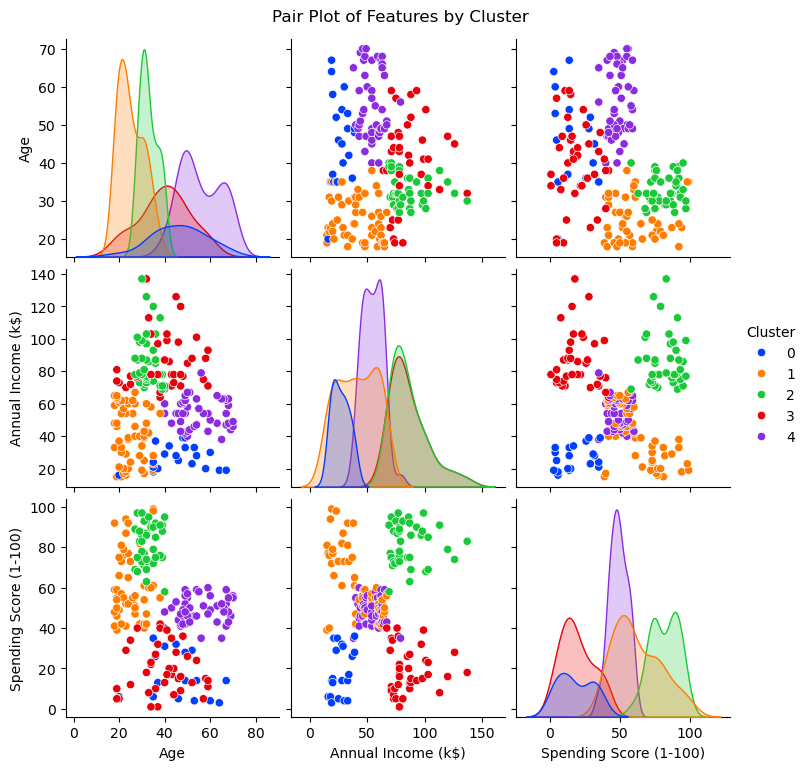

In [29]:
# --- Deliverable 2: Pair Plots ---
print("\n--- Generating Pair Plots (This may take a moment) ---")

# ---- Feature relationships by cluster ----

pairplot_df = df.drop('CustomerID', axis=1)
sns.pairplot(pairplot_df, hue='Cluster', palette='bright')
plt.suptitle('Pair Plot of Features by Cluster', y=1.02)
plt.show()

## 4. Cluster Analysis and Recommendations

We analyzed each cluster by calculating the average **Age**, **Income**, and **Spending Score**.


In [30]:
# Analyze the characteristics of each cluster
cluster_analysis = df.drop(['CustomerID', 'Gender'], axis=1).groupby('Cluster').mean()
print("\n--- Cluster Characteristics (Averages) ---")
print(cluster_analysis)


--- Cluster Characteristics (Averages) ---
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064


## 5. Actionable Recommendations

Based on the cluster analysis, here are the profiles and strategies:

### Cluster 2: "VIPs"
- **Profile:** Young (~33), highest income (86k), highest spending (81.5)  
- **Recommendation:** Target with premium product ads, loyalty programs, and exclusive offers.  

### Cluster 3: "Careful & Wealthy"
- **Profile:** Middle-aged (~40), high income (86k), but low spending (19.3)  
- **Recommendation:** Focus on quality and long-term value instead of discounts.  

### Cluster 1: "Young & Eager"
- **Profile:** Young (~25), medium income (41k), but high spending (62.2)  
- **Recommendation:** Target with trendy, impulse-buy campaigns via social media.  

### Cluster 4: "Standard / Average"
- **Profile:** Older (~56), medium income (54k), medium spending (48.8)  
- **Recommendation:** Keep them engaged with general promotions and newsletters.  

### Cluster 0: "Careful & Low-Income"
- **Profile:** Middle-aged (~46), low income (26.7k), low spending (18.3)  
- **Recommendation:** Minimal marketing; only target with clearance or discount sales.


---

## ✅ Conclusion

This project successfully segmented mall customers into **five meaningful groups** using **K-Means clustering**.  
These insights can help guide **data-driven marketing strategies** by focusing resources on high-value customer segments.  
Future work could include adding more features (like gender, frequency of visits, or product categories) for even deeper segmentation.
